In [5]:
import pandas as pd
import numpy as np
from tensorflow.keras import datasets,models,layers
import seaborn as sn
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report
from tensorflow.keras.applications.vgg16 import VGG16

# **We freeze the layers and re-train the softmax layer**

In [6]:
model_vgg16=VGG16(weights='imagenet', input_shape=(32, 32, 3), include_top=False)

In [7]:
model_vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [8]:
# Add Flatten layer
model = models.Sequential()
model.add(model_vgg16)
model.add(layers.Flatten())

In [9]:
# Add Dense layer and then Dense layer with final output.
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dense_4 (Dense)             (None, 10)                5130      
                                                                 
Total params: 14982474 (57.15 MB)
Trainable params: 14982474 (57.15 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
optimizer = keras.optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],
            )

In [12]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [13]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 51s 29ms/step - loss: 0.8133 - accuracy: 0.7201
Epoch 2/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.4885 - accuracy: 0.8346
Epoch 3/10
1563/1563 [==============================] - 45s 28ms/step - loss: 0.3459 - accuracy: 0.8839
Epoch 4/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.2429 - accuracy: 0.9187
Epoch 5/10
1563/1563 [==============================] - 46s 29ms/step - loss: 0.1758 - accuracy: 0.9403
Epoch 6/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.1238 - accuracy: 0.9591
Epoch 7/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.1003 - accuracy: 0.9670
Epoch 8/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.0833 - accuracy: 0.9736
Epoch 9/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.0668 - accuracy: 0.9792
Epoch 10/10
1563/1563 [==============================] - 45s 29m

In [14]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.7032 - accuracy: 0.8418


[0.7031908631324768, 0.8417999744415283]

313/313 [==============================] - 3s 8ms/step


Text(95.72222222222221, 0.5, 'Truth')

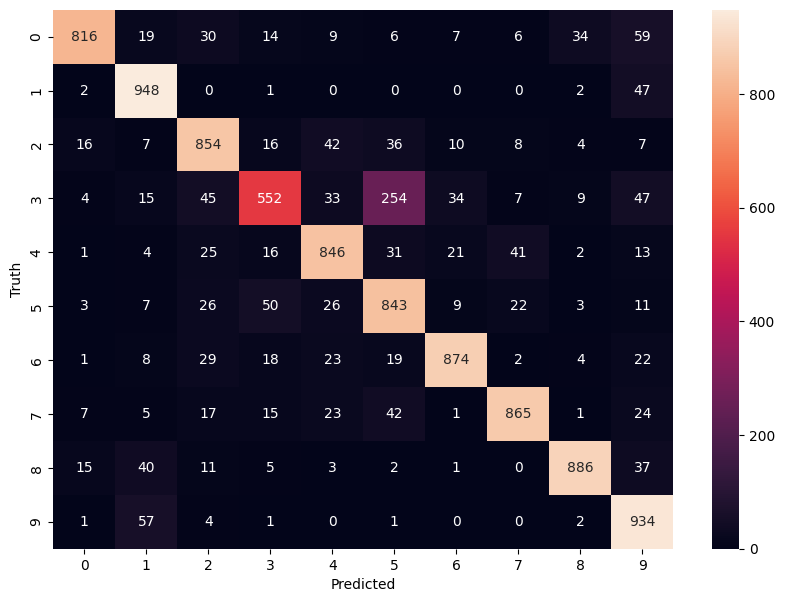

In [15]:
y_pred = model.predict(X_test)
y_pred_labels=[np.argmax(element) for element in y_pred]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [16]:
print("Classification Report: \n", classification_report(y_test, y_pred_labels))

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.82      0.87      1000
           1       0.85      0.95      0.90      1000
           2       0.82      0.85      0.84      1000
           3       0.80      0.55      0.65      1000
           4       0.84      0.85      0.84      1000
           5       0.68      0.84      0.75      1000
           6       0.91      0.87      0.89      1000
           7       0.91      0.86      0.89      1000
           8       0.94      0.89      0.91      1000
           9       0.78      0.93      0.85      1000

    accuracy                           0.84     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.85      0.84      0.84     10000

